# 유방암 데이터
- 10, 5, 2 차원으로 차원축소
- 원본과 차원축소한 데이터의 분류 정확도 측정
- 2차원으로 축소한 것은 시각화
- 군집화하기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

- 차원 축소(10, 5, 2차원)

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [3]:
# 정규화
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cancer_std = scaler.fit_transform(cancer.data)

In [4]:
# 차원 축소 - 10차원
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
cancer_pca10 = pca.fit_transform(cancer_std)
cancer_pca10[:3]

array([[ 9.19283683,  1.94858307, -1.12316616,  3.63373089, -1.19511011,
         1.41142457,  2.15937002, -0.39840728, -0.15711376, -0.87739421],
       [ 2.3878018 , -3.76817174, -0.52929269,  1.11826387,  0.62177496,
         0.02865618,  0.01335818,  0.24098918, -0.71190939,  1.106982  ],
       [ 5.73389628, -1.0751738 , -0.5517476 ,  0.91208268, -0.1770859 ,
         0.5414521 , -0.66816637,  0.0973699 ,  0.02405654,  0.45428056]])

In [5]:
# 차원 축소 - 5차원
pca = PCA(n_components=5)
cancer_pca5 = pca.fit_transform(cancer_std)
cancer_pca5[:3]

array([[ 9.19283683,  1.94858307, -1.12316614,  3.63373129, -1.19511113],
       [ 2.3878018 , -3.76817174, -0.52929272,  1.11826328,  0.62177627],
       [ 5.73389628, -1.0751738 , -0.55174758,  0.91208301, -0.17708646]])

In [6]:
# 차원 축소 - 2차원
pca = PCA(n_components=2)
cancer_pca2 = pca.fit_transform(cancer_std)
cancer_pca2[:3]

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ]])

- 원본과 차원축소한 데이터의 분류 정확도 측정

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [8]:
# 원본 데이터 분류 정확도
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=2021
)

dtc = DecisionTreeClassifier(random_state=2021)
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
accuracy_score(y_test, pred)

0.9090909090909091

In [9]:
# 10차원 축소 데이터 분류 정확도
X_train, X_test, y_train, y_test = train_test_split(
    cancer_pca10, cancer.target, stratify=cancer.target, random_state=2021
)

dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
accuracy_score(y_test, pred)

0.9790209790209791

In [10]:
# 5차원 축소 데이터 분류 정확도
X_train, X_test, y_train, y_test = train_test_split(
    cancer_pca5, cancer.target, stratify=cancer.target, random_state=2021
)

dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
accuracy_score(y_test, pred)

0.951048951048951

In [11]:
# 2차원 축소 데이터 분류 정확도
X_train, X_test, y_train, y_test = train_test_split(
    cancer_pca2, cancer.target, stratify=cancer.target, random_state=2021
)

dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
accuracy_score(y_test, pred)

0.916083916083916

- 2차원 축소 데이터 시각화

In [12]:
cancer_df = pd.DataFrame(cancer_pca2, columns=['PC1', 'PC2'])
cancer_df['target'] = cancer.target
cancer_df.head()

,PC1,PC2,target
0,9.192837,1.948583,0
1,2.387802,-3.768172,0
2,5.733896,-1.075174,0
3,7.122953,10.275589,0
4,3.935302,-1.948072,0


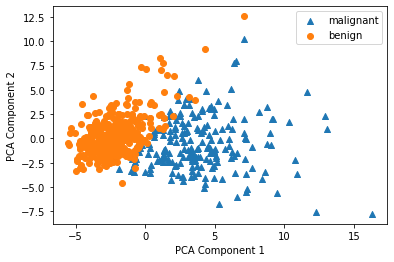

In [13]:
markers = ['^', 'o']

for i, marker in enumerate(markers):
    x_axis_data = cancer_df[cancer_df.target == i]['PC1']
    y_axis_data = cancer_df[cancer_df.target == i]['PC2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,
                label=cancer.target_names[i])

plt.legend()
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

- 군집화

In [14]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=2021)
kmeans.fit(cancer_std)

KMeans(n_clusters=2, random_state=2021)

In [15]:
cancer_df['cluster'] = kmeans.labels_
cancer_df.tail()

,PC1,PC2,target,cluster
564,6.439315,-3.576817,0,0
565,3.793382,-3.584048,0,0
566,1.256179,-1.902297,0,0
567,10.374794,1.672010,0,0
568,-5.475243,-0.670637,1,1


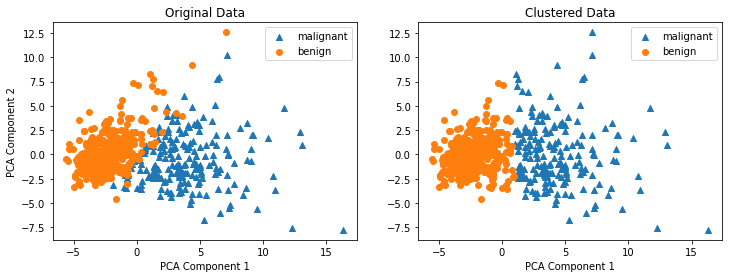

In [16]:
markers = ['^', 'o']

fig, axs = plt.subplots(figsize=(12,4), ncols=2, nrows=1)
for k, column in enumerate(['target','cluster']):
    ax = axs[k]
    for i, marker in enumerate(markers):
        x_axis_data = cancer_df[cancer_df[column] == i]['PC1']
        y_axis_data = cancer_df[cancer_df[column] == i]['PC2']
        ax.scatter(x_axis_data, y_axis_data, marker=marker,
                   label=cancer.target_names[i])

    if k==0:    # target인 경우
        ax.legend()
        ax.set_ylabel('PCA Component 2')
        ax.set_title('Original Data')
    else:       # cluster인 경우
        ax.legend()
        ax.set_title('Clustered Data')
    ax.set_xlabel('PCA Component 1')

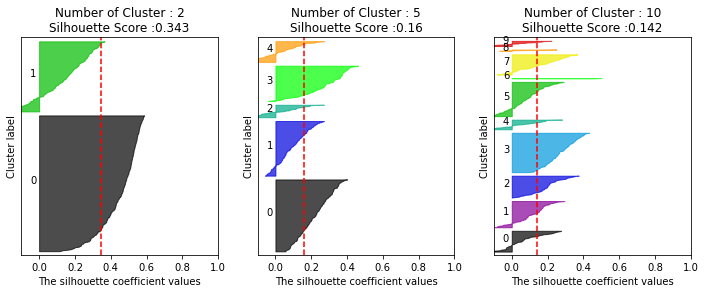

In [17]:
from visualize import visualize_silhouette

visualize_silhouette([2,5,10], cancer_std)

- 분류 정확도(re)

In [22]:
def pca_accuracy(X, y):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, stratify=y, test_size=0.2, random_state=2021
    )
    dtc = DecisionTreeClassifier(random_state=2021)
    dtc.fit(X_train, y_train)
    pred = dtc.predict(X_test)
    acc = accuracy_score(y_test, pred)
    return np.round(acc, 4)

In [23]:
print('PCA 2 정확도:', pca_accuracy(cancer_pca2, cancer.target))
print('PCA 5 정확도:', pca_accuracy(cancer_pca5, cancer.target))
print('PCA 10 정확도:', pca_accuracy(cancer_pca10, cancer.target))
print('원데이터 정확도:', pca_accuracy(cancer_std, cancer.target))

PCA 2 정확도: 0.9211
PCA 5 정확도: 0.9649
PCA 10 정확도: 0.9912
원데이터 정확도: 0.8947


### globals() 활용
- 전역 변수를 딕셔너리에 담아두기

In [24]:
for dim in [2, 5, 10]:
    globals()[f'pca{dim}'] = PCA(n_components=dim)
    globals()[f'cancerPCA{dim}'] = globals()[f'pca{dim}'].fit_transform(cancer_std)
    acc = pca_accuracy(globals()[f'cancerPCA{dim}'], cancer.target)
    print(f'PCA {dim} 정확도: {acc}')
print('원데이터 정확도:', pca_accuracy(cancer_std, cancer.target))

PCA 2 정확도: 0.9211
PCA 5 정확도: 0.9649
PCA 10 정확도: 0.9912
원데이터 정확도: 0.8947
